# Подключаем Googledrive к GoogleColab

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Необходимые библиотеки


In [0]:
import sklearn.tree as tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

# Чтение данных

In [0]:

#file_table="/content/drive/My Drive/melanch/streetswithPC.xlsx"
#file_table="/content/drive/My Drive/Диссертация/data/streetswithPC.xlsx"
# Using Melanch datasets
#path="/content/drive/My Drive/melanch/"

# Using Melanch Final datasets
path="/content/drive/My Drive/Диссертация/data/"
file_table="streetswithPC.xlsx"
file_attr="AttrNames.xlsx"
file_test="streetsnoPC.xlsx"




#Читаем входные данные, которые сохранены в Лист 1
NList=1
DataListID=NList-1

df=pd.read_excel(path+file_table, sheet_name=DataListID)

# Читаем имена атрибутов, которые сохранены в Лист_1
AttrListID=0
dfattr=pd.read_excel(path+file_attr, sheet_name=AttrListID)



# Смотрим месторасположение улицы на карте


In [130]:
print("Name: ",df.iloc[0]["Name"])
print("Map: ",df.iloc[0].GPS)

Name:  ул. Промышленная
Map:  "https://yandex.ru/maps/2/saint-petersburg/?ll=30.273518%2C59.899136&mode=usermaps&source=constructorLink&um=constructor%3A536dd7a9b4f7fb9a8a1e80fccbac7dd471fdee9fc4e273d30f1a731f20a8b4ac&z=16"


# Использование всех таблиц

In [131]:
NSheets=len(pd.read_excel(path+file_table, sheet_name=None))
print("found total Nsheets: "+file_table,NSheets)
df_from_each_file=(pd.read_excel(path+file_table,sheet_name=i) for i in range(0,NSheets))
dfvec=pd.concat(df_from_each_file, ignore_index=True).fillna(0,downcast='infer')
df=dfvec


found total Nsheets: streetswithPC.xlsx 14


In [133]:
# Нам нужно отформатировать таблицу атрибутов
dfattr

,Name,Reference
0,остановка общественного транспорта,Attr01
1,метро,Attr02
2,"торговый центр, метро и др.",Attr03
3,зеленая зона (сад),Attr04
4,"образовательное учреждение (Д/САД, ШКОЛА, УНИВЕР)",Attr05
5,жилое помещение,Attr06
6,жилое помещение с размещением социально-значим...,Attr07
7,бизнес-центр,Attr08
8,"бизнес-центр, офисные помещения, магазины, каф...",Attr09
9,супермаркет,Attr10


# Подготовка данных

In [0]:
# Меняем формат таблиц атрибутов, чтобы попроще добраться до названия атрибутов
# Например: dft90.Attr1
dfattr90=dfattr.T.copy()
dfattr90.columns=dfattr["Reference"]
dfattr90=dfattr90.drop(index="Reference")

#df['PC']=df['PC'].map({'YES': 1, 'NO': 0})

attr_cols = [c for c in df if c.startswith('Attr')]
target_names=dfattr90[attr_cols].iloc[0].values
feature_names=df["PC"].values
# Разделяем данные на признаки(feature) и на цели(target)
# имена признаков, feature 
X=df[attr_cols]
# выбор колонки для классификации, target
Y=df["PC"]


# Проверка данных

In [135]:
dfattr90

Reference,Attr01,Attr02,Attr03,Attr04,Attr05,Attr06,Attr07,Attr08,Attr09,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20
Name,остановка общественного транспорта,метро,"торговый центр, метро и др.",зеленая зона (сад),"образовательное учреждение (Д/САД, ШКОЛА, УНИВЕР)",жилое помещение,жилое помещение с размещением социально-значим...,бизнес-центр,"бизнес-центр, офисные помещения, магазины, каф...",супермаркет,торговый центр,продуктовый (продовольственный) магазин,производственная зона,зоомагазин,"Собор, Церковь",гостиница,музей,автосалон,"комплекс, где расположены банк, почта, кафе, к...","столовая, кафе"


In [136]:
df

,Name,GPS,SecN,Attr01,Attr02,Attr03,Attr04,Attr05,Attr06,Attr07,Attr08,Attr09,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,PC
0,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
2,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",2,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,YES
3,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
4,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",4,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,ул. Зайцева,https://yandex.ru/maps/?um=constructor%3Ac4fc4...,5,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
136,ул. Зайцева,https://yandex.ru/maps/?um=constructor%3Ac4fc4...,6,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
137,ул. Зайцева,https://yandex.ru/maps/?um=constructor%3Ac4fc4...,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,YES
138,ул. Зайцева,https://yandex.ru/maps/?um=constructor%3Ac4fc4...,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,YES


# Построение дерева решений

In [0]:
# Построение классификационного дерева на основе X и Y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)


In [137]:
attr_names_short=[]
for s in dfattr90[attr_cols].values[0]:
  ret=s[0:10]+"..."
  print(ret)
  attr_names_short.append(ret)

остановка ...
метро...
торговый ц...
зеленая зо...
образовате...
жилое поме...
жилое поме...
бизнес-цен...
бизнес-цен...
супермарке...
торговый ц...
продуктовы...
производст...
зоомагазин...
Собор, Цер...
гостиница...
музей...
автосалон...
комплекс, ...
столовая, ...


# Визуализация дерева решений

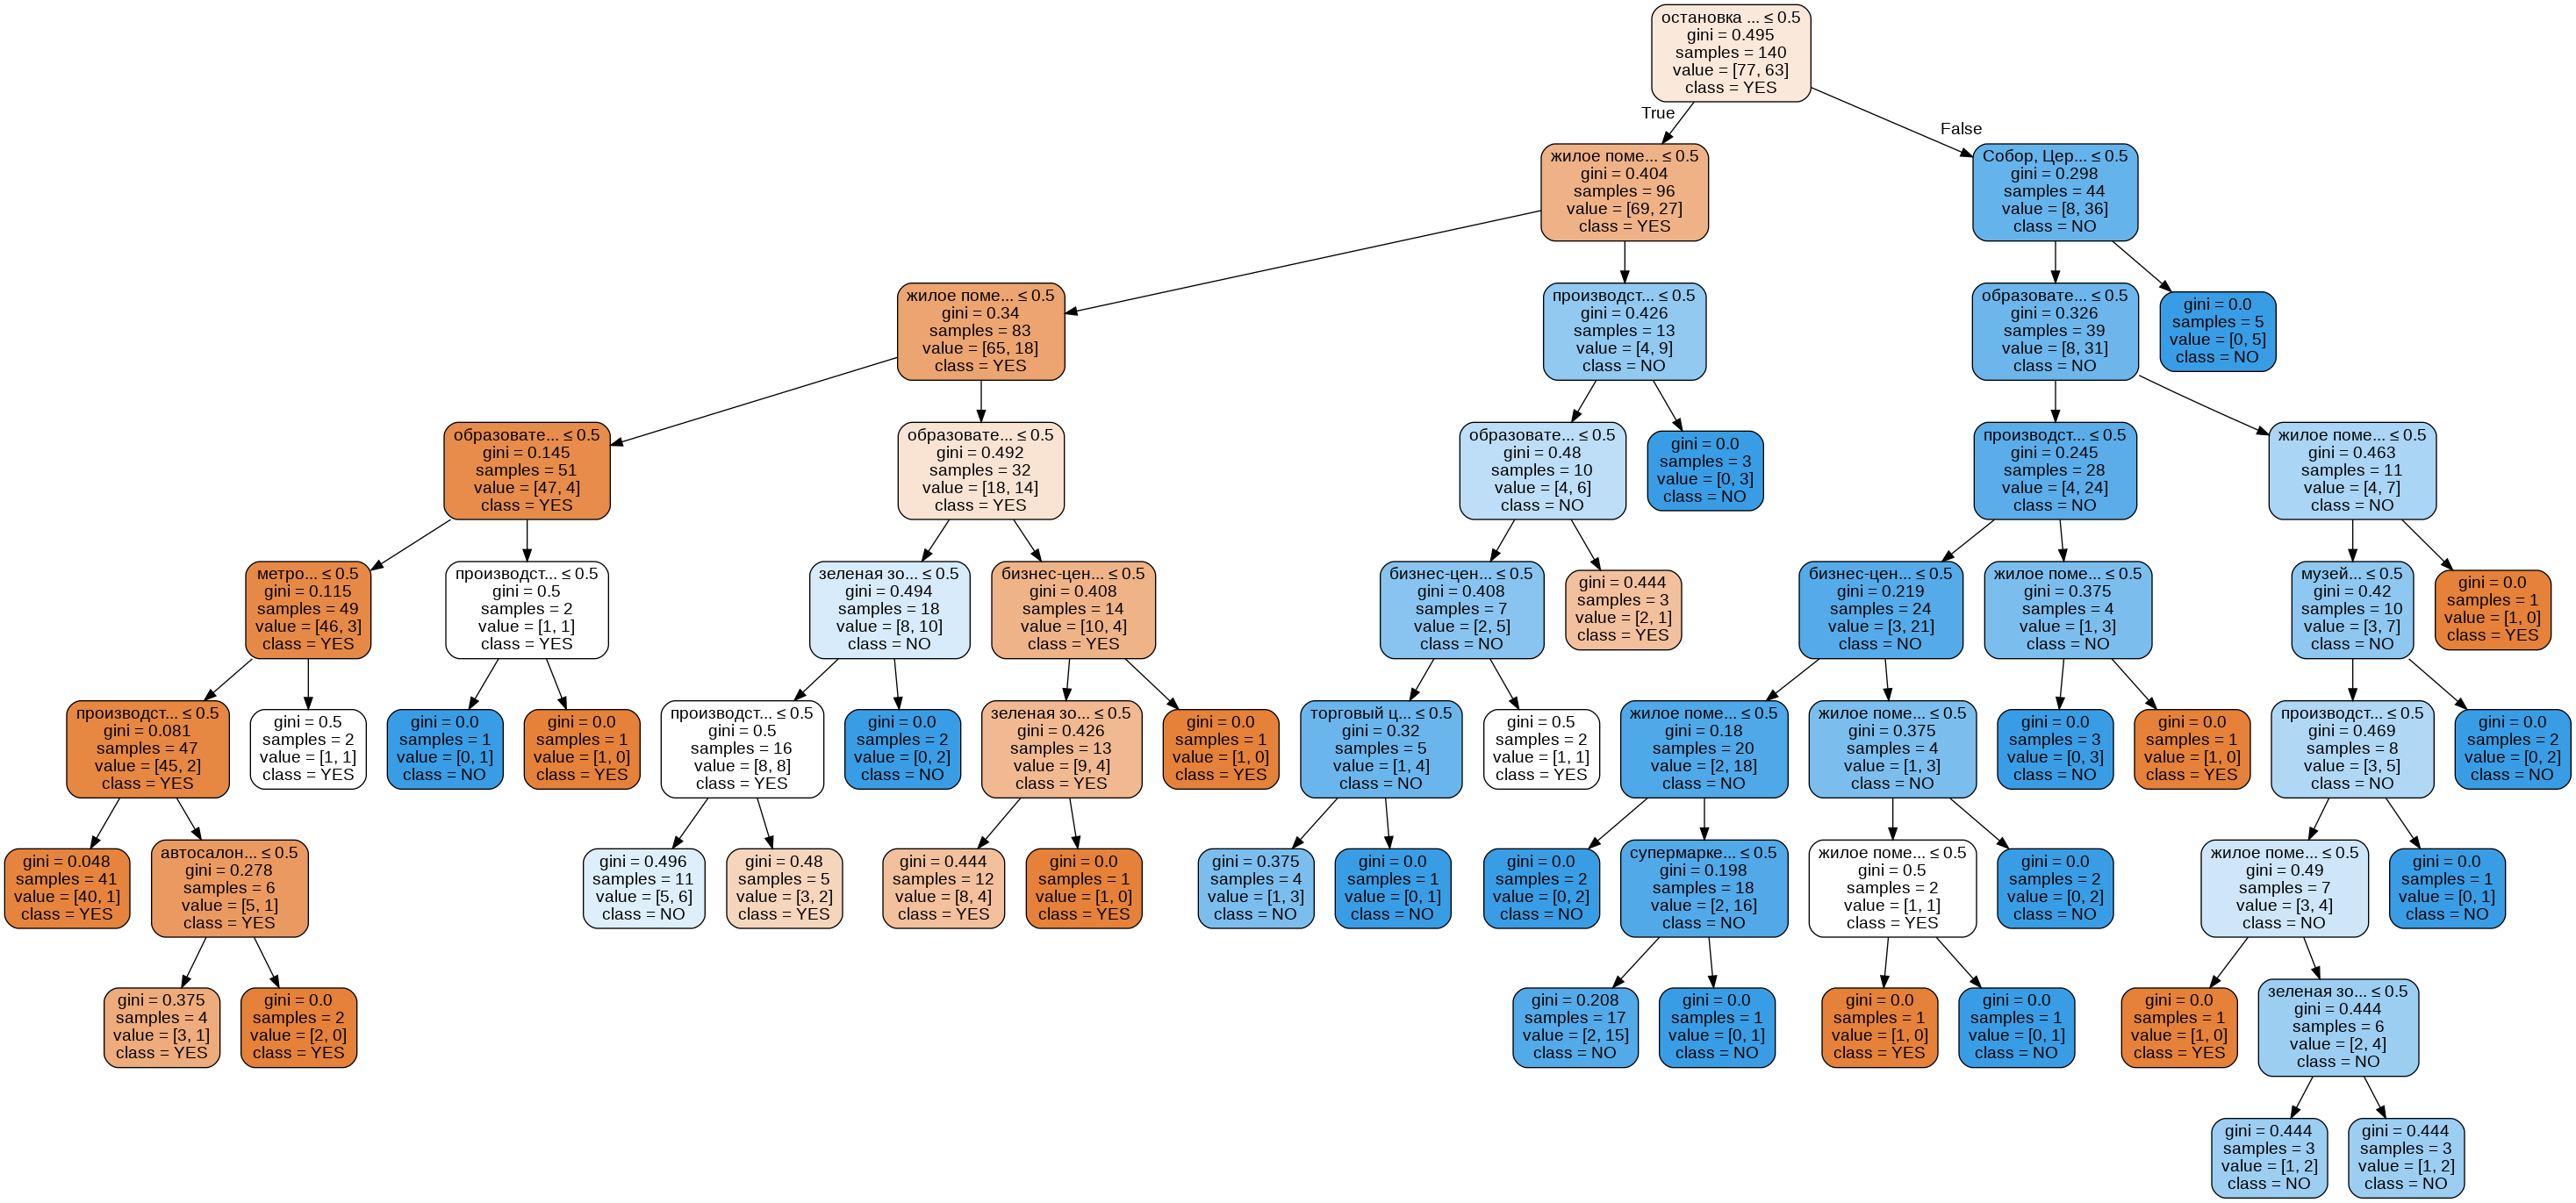

In [138]:
dot_data = StringIO()
tree.export_graphviz(clf,
 out_file=dot_data,
 #class_names=target_names, # the target names.
 feature_names = attr_names_short,
 #max_depth=3,
 class_names=['YES',"NO"],
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Тестирование дерева решений

In [139]:
# Тестируем дерево на основе данных, которые уже использовались при построении дерева
# Тестовые входные данные те же самые, что и использовались для тренировки дерева
# Чтобы показать, что использование библиотек и тренировка дерева прошли успешно
def TestSec2PC(SecN):
    PC=clf.predict([X.iloc[SecN].values])
    print("Мы тестируем Sec = "+str(SecN)+" и получаем результат: нам нужен пешеходный переход на "+df['Name'].iloc[SecN]+": "+str(PC), " До этого было "+str(df.iloc[SecN].PC))


for SecN in range(0,10):
  TestSec2PC(SecN)


Мы тестируем Sec = 0 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 1 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 2 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 3 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 4 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 5 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 6 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 7 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 8 и получаем результат: нам нуж

In [140]:
# Читаем новые входные данные для тестирования, которые не имеют информации о переходах
#Читаем входные данные, которые сохранены в Лист 1

NList=1
DataListID=NList-1
dfTest=pd.read_excel(path+file_test,sheet_name=DataListID)
#dfTest['PC']=dfTest['PC'].map({'YES': 1, 'NO': 0})

print("Name: ",dfTest.iloc[0]["Name"])
print("Map: ",dfTest.iloc[0].GPS)

# Готовим входные данные для тестирования
# Так как наше дерево было натренировано на 19 входных атрибутов, нам необходимо подготовить входную таблицу с тем же количеством атрибутов
attr_cols_test = attr_cols 
dfTestX=dfTest[attr_cols_test].copy(deep=True)
dfTestX.fillna(0,inplace=True,downcast='infer')# Неизвестным значениям задаем 0, так как они не влияют на результат решения


Name:  пер. Челиева
Map:  "https://yandex.ru/maps/?um=constructor%3A62895f23c0fe9a1d96668421b95cb270c42b7f9cb1ae27644feea0a0fe467763&source=constructorLink"


In [141]:
# Тестируем дерево принятия решений на входные тестовые данные 

for SecN in range(0,10):
    PC=clf.predict([dfTestX.iloc[SecN].values])
    print("Мы тестируем Sec = "+str(SecN)+" и получаем результат: нам нужен пешеходный переход на "+dfTest['Name'].iloc[SecN]+": "+str(PC), " До этого было "+str(dfTest.iloc[SecN].PC))


Мы тестируем Sec = 0 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 1 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 2 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 3 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 4 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 5 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 6 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 7 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['YES']  До этого было NO
Мы тестируем Sec = 8 и получаем результат: нам нужен пешеходный переход на пер. Челиева

# Будущая работа
Для будущей работы нам нужен большой объём входных данных на сектора улиц для улучшения результата

* Model1 SPiterDT-1 - (X,Y,clf) - исторический центр
* Model2 SPiterDT-2 - (X2,Y2,clf2) - спальные районы
* ... и т.д.

# Bootstraping the trees
* using xgboost
* selecting random sample
* checking accurancy 

In [142]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_tree,plot_importance

train_x = X
train_y = Y

test_data=df.sample(10).copy(deep=True)
test_x  = test_data[attr_cols]
test_y  = test_data["PC"]

model = XGBClassifier(seed=42)
 
# fit the model with the training data
model.fit(train_x,train_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [143]:
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data ['NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES']

accuracy_score on train dataset :  0.8071428571428572


In [148]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 


# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data ['YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']

accuracy_score on test dataset :  0.8


In [0]:
predict_test

array(['NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO'],
      dtype=object)

In [0]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model, num_trees=4, ax=ax)
plt.show()

Importance Type= weight


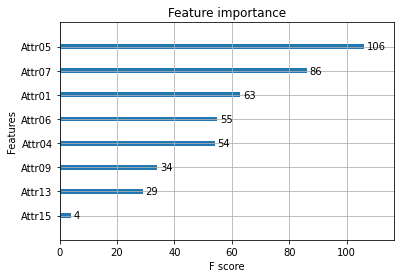

Importance Type= gain


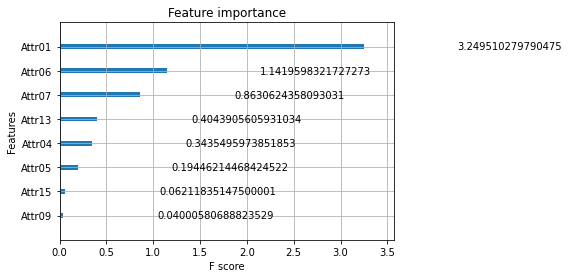

In [0]:
for t in ["weight","gain"]:
  print("Importance Type= "+t)
  plot_importance(model,importance_type=t)
  plt.show()
